本笔记本对应知乎问题 [蜜蜂在蜂巢随机游走一百步后离原点的距离期望是多少?](https://www.zhihu.com/question/266611177)

In [1]:
import numpy as np

In [45]:
A168605 =[1,2,8,30,104,342,1088,3390,10424,31782,96368,
 291150,877544,2640822,7938848,23849310,71613464,
 214971462,645176528,1936053870,5809210184,
 17429727702,52293377408,156888520830,470682339704,
 1412080573542]

A168605 = np.array(A168605)

In [2]:
###### 格点距离的精确精确解
N = 200
# arr = np.zeros((N//2,N),dtype ='float32')
arr = np.zeros((N//2,N),dtype =int)
arr[0,N//2]=1
# print arr
for i in range(1,N//2):
    last = arr[i-1,:]
    fir = [1]*3
    arr[i,:] = np.convolve(last,fir,mode='same')
#     arr[i,:] = arr[i,:]/arr[i,:].sum() ###可以考虑归一化防止underflow
    

x = abs(np.arange(0,N) - N//2)[None,:] ### grid x
# print arr[0,np.where(x == 0)[1]]
SUM = np.sum(x*arr,axis = 1)
print ','.join(str(x) for x in SUM.tolist()[:20])


0,2,8,30,104,350,1152,3738,12000,38214,120920,380666,1193304,3727490,11608352,36057510,111747744,345636486,1067179320,3289843578


In [4]:
%%time
#### 仿射坐标系上的蒙特卡罗采样
import numpy as np
import matplotlib.pyplot as plt

if 'tvec' in locals():
    del tvec,Tvec ##清理内存
    
sample_size = int(5E5)
T = 150
delta = np.array([(0,1),(1,1),(1,0),(0,-1),(-1,-1),(-1,0)])
idx = np.random.choice(6,size=(sample_size,T))
dvec = delta[idx]
Tvec = np.cumsum(dvec,axis = 1)

CPU times: user 3.47 s, sys: 636 ms, total: 4.11 s
Wall time: 4.17 s


t=100 , N=5.000000E+05


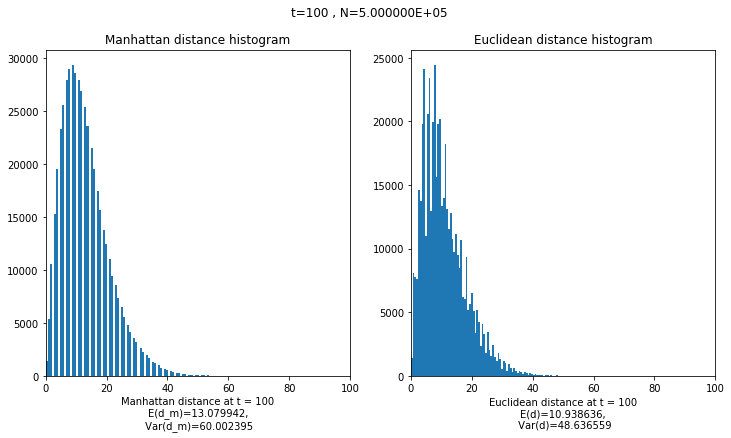

In [11]:
#### 数据可视化
t = 100

def histo_t(t,sample_size = sample_size,Tvec = Tvec):
    tvec = Tvec[:,t]
    stl = "t=%d , N=%E"%(t,sample_size)
    print stl
    plt.figure(figsize = [12,6])
    plt.subplot(121)
    hex_dist = np.sum(abs(tvec),axis = 1)
    plt.hist(hex_dist,t)
    plt.xlim(0,t)
    plt.title("Manhattan distance histogram")
    stat = "E(d_m)=%f,\n Var(d_m)=%f"%(hex_dist.mean(),hex_dist.var())
    plt.xlabel('Manhattan distance at t = %d\n'%t+stat)
    # plt.show()
    # print "E(d_m)=",hex_dist.mean()

    plt.subplot(122)

    euc_dist = np.sqrt(np.sum(tvec**2,axis = 1) + tvec[:,0]*tvec[:,1])
    plt.hist(euc_dist,t)
    plt.xlim(0,t)
    plt.title("Euclidean distance histogram")
    stat = "E(d)=%f,\n Var(d)=%f"%(euc_dist.mean(),euc_dist.var())

    plt.xlabel('Euclidean distance at t = %d\n'%t+stat)

    plt.suptitle(stl)
    plt.show()
    return plt.gcf()
histo_t(100);

t=50 , N=5.000000E+05


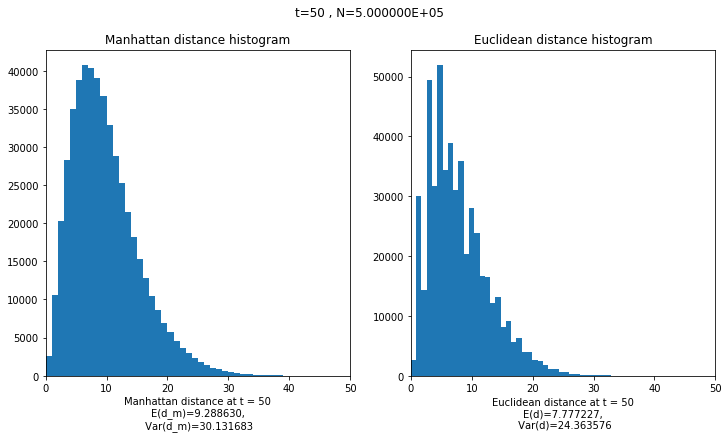

In [12]:
histo_t(50);

In [289]:
#### 一个不太成熟的近似

def ms():

    a, b, c, d, n = 0, 1, 1, -1, 1

    #yield 1

    while True:

        if 1:
            yield -b + (-1)**n*d
        n += 1

        a, b = b, (3*(n-1)*n*a+(2*n-1)*n*b)/((n+1)*(n-1))

        c, d = d, (3*(n-1)*c-(2*n-1)*d)/n
#         if n >=0:

A005043 = ms()

print([A005043.next() for _ in range(32)])

A005043 = ms()
lst = []
b = 1
for i in range(100):
    y = 3.**(i+1) /2. / b
    print y
    a = A005043.next()
    b = 3*b-2*a
    
#     print (3.**i)
#    print x/3.**i
#    y = 3/2. * 1 / (1+x/3.**i)
#     print a,b

[0, 1, 1, 3, 6, 15, 36, 91, 232, 603, 1585, 4213, 11298, 30537, 83097, 227475, 625992, 1730787, 4805595, 13393689, 37458330, 105089229, 295673994, 834086421, 2358641376, 6684761125, 18985057351, 54022715451, 154000562758, 439742222071, 1257643249140, 3602118427251]
1.5
1.5
1.92857142857
2.13157894737
2.38235294118
2.58510638298
2.78244274809
2.96341463415
3.135234151
3.29772143416
3.45275406385
3.60108552765
3.74357920739
3.88084991407
4.01344003464
4.14179437932
4.26629506933
4.38726887116
4.50499930801
4.61973373139
4.73168964771
4.84105946012
4.94801436535
5.05270747838
5.15527639893
5.2558453249
5.35452681071
5.45142323956
5.54662806492
5.64022686368
5.73229823503
5.82291457153
5.91214272405
6.00004457792
6.0866775542
6.17209504784
6.256346812
6.33947929646
6.42153594671
6.50255746906
6.58258206643
6.66164564868
6.73978202073
6.81702305134
6.89339882488
6.96893777806
7.04366682359
7.11761146209
7.19079588367
7.26324306033
7.3349748301
7.4060119739
7.47637428581
7.54608063742
7.6151